In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
pip install  ta

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Download BTC-USD data
ticker = "BTC-USD"
data = yf.download(ticker, start="2024-05-01", end="2024-12-04", interval="1D")
data = data['Close'].reset_index()
data.columns = ['Date', 'Close']
print(data.tail())

[*********************100%***********************]  1 of 1 completed

          Date         Close
212 2024-11-29  97461.523438
213 2024-11-30  96449.054688
214 2024-12-01  97279.789062
215 2024-12-02  95865.304688
216 2024-12-03  96002.164062


In [62]:
# Confirm that the index is datetime
print(data.index)
# If not in datetime format, convert it
data.index = pd.to_datetime(data.index)
# Now proceed with the rest of the processing

data = yf.download(ticker, start="2024-05-01", end="2024-12-04", interval="1D")
data.reset_index(inplace=True)

print(data.head())

[*********************100%***********************]  1 of 1 completed

RangeIndex(start=0, stop=217, step=1)
Price        Date     Adj Close         Close          High           Low  \
Ticker                  BTC-USD       BTC-USD       BTC-USD       BTC-USD   
0      2024-05-01  58254.011719  58254.011719  60780.500000  56555.292969   
1      2024-05-02  59123.433594  59123.433594  59602.296875  56937.203125   
2      2024-05-03  62889.835938  62889.835938  63320.503906  58848.312500   
3      2024-05-04  63891.472656  63891.472656  64494.957031  62599.351562   
4      2024-05-05  64031.132812  64031.132812  64610.890625  62955.304688   

Price           Open       Volume  
Ticker       BTC-USD      BTC-USD  
0       60609.496094  48439780271  
1       58253.703125  32711813559  
2       59122.300781  33172023048  
3       62891.031250  20620477992  
4       63892.453125  18296164805  


In [63]:
# Download BTC-USD data
ticker = "BTC-USD"
data = yf.download(ticker, start="2024-05-01", end="2024-12-04", interval="1D")

# Confirm that the index is a DatetimeIndex
print(data.index)  # Should already be datetime
data.index = pd.to_datetime(data.index)

[*********************100%***********************]  1 of 1 completed

DatetimeIndex(['2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04',
               '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08',
               '2024-05-09', '2024-05-10',
               ...
               '2024-11-24', '2024-11-25', '2024-11-26', '2024-11-27',
               '2024-11-28', '2024-11-29', '2024-11-30', '2024-12-01',
               '2024-12-02', '2024-12-03'],
              dtype='datetime64[ns]', name='Date', length=217, freq=None)


In [64]:
 print(data.head())

Price          Adj Close         Close          High           Low  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-05-01  58254.011719  58254.011719  60780.500000  56555.292969   
2024-05-02  59123.433594  59123.433594  59602.296875  56937.203125   
2024-05-03  62889.835938  62889.835938  63320.503906  58848.312500   
2024-05-04  63891.472656  63891.472656  64494.957031  62599.351562   
2024-05-05  64031.132812  64031.132812  64610.890625  62955.304688   

Price               Open       Volume  
Ticker           BTC-USD      BTC-USD  
Date                                   
2024-05-01  60609.496094  48439780271  
2024-05-02  58253.703125  32711813559  
2024-05-03  59122.300781  33172023048  
2024-05-04  62891.031250  20620477992  
2024-05-05  63892.453125  18296164805  


In [65]:
# Rolling support and resistance levels
data['Support'] = data['Close'].rolling(window=20).min()
data['Resistance'] = data['Close'].rolling(window=20).max()

print(data[['Close', 'Support', 'Resistance']].tail())

Price              Close       Support    Resistance
Ticker           BTC-USD                            
Date                                                
2024-11-29  97461.523438  80474.187500  98997.664062
2024-11-30  96449.054688  87250.429688  98997.664062
2024-12-01  97279.789062  87250.429688  98997.664062
2024-12-02  95865.304688  87250.429688  98997.664062
2024-12-03  96002.164062  87250.429688  98997.664062


In [66]:
# Simple Moving Averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
print(data.head(1000))
print(type(data['Close']))

Price          Adj Close         Close          High           Low  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-05-01  58254.011719  58254.011719  60780.500000  56555.292969   
2024-05-02  59123.433594  59123.433594  59602.296875  56937.203125   
2024-05-03  62889.835938  62889.835938  63320.503906  58848.312500   
2024-05-04  63891.472656  63891.472656  64494.957031  62599.351562   
2024-05-05  64031.132812  64031.132812  64610.890625  62955.304688   
...                  ...           ...           ...           ...   
2024-11-29  97461.523438  97461.523438  98693.171875  95407.882812   
2024-11-30  96449.054688  96449.054688  97499.343750  96144.218750   
2024-12-01  97279.789062  97279.789062  97888.125000  95770.187500   
2024-12-02  95865.304688  95865.304688  98152.601562  94482.867188   
2024-12-03  96002.164062  96002.164062  96297.203125  93629.562500   

Price              

In [67]:
from ta.momentum import RSIIndicator

In [68]:
print(data.columns)

MultiIndex([( 'Adj Close', 'BTC-USD'),
            (     'Close', 'BTC-USD'),
            (      'High', 'BTC-USD'),
            (       'Low', 'BTC-USD'),
            (      'Open', 'BTC-USD'),
            (    'Volume', 'BTC-USD'),
            (   'Support',        ''),
            ('Resistance',        ''),
            (    'SMA_20',        ''),
            (    'SMA_50',        '')],
           names=['Price', 'Ticker'])


In [69]:
# Flatten the MultiIndex columns
data.columns = ['_'.join(filter(None, col)).strip() for col in data.columns]

# Print the updated column names
print(data.columns)

Index(['Adj Close_BTC-USD', 'Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD',
       'Open_BTC-USD', 'Volume_BTC-USD', 'Support', 'Resistance', 'SMA_20',
       'SMA_50'],
      dtype='object')


In [70]:
# Calculate RSI using the 'Close_BTC-USD' column
data['RSI'] = RSIIndicator(close=data['Close_BTC-USD'], window=14).rsi()

# Print the DataFrame to verify
print(data.head(1000))

            Adj Close_BTC-USD  Close_BTC-USD  High_BTC-USD   Low_BTC-USD  \
Date                                                                       
2024-05-01       58254.011719   58254.011719  60780.500000  56555.292969   
2024-05-02       59123.433594   59123.433594  59602.296875  56937.203125   
2024-05-03       62889.835938   62889.835938  63320.503906  58848.312500   
2024-05-04       63891.472656   63891.472656  64494.957031  62599.351562   
2024-05-05       64031.132812   64031.132812  64610.890625  62955.304688   
...                       ...            ...           ...           ...   
2024-11-29       97461.523438   97461.523438  98693.171875  95407.882812   
2024-11-30       96449.054688   96449.054688  97499.343750  96144.218750   
2024-12-01       97279.789062   97279.789062  97888.125000  95770.187500   
2024-12-02       95865.304688   95865.304688  98152.601562  94482.867188   
2024-12-03       96002.164062   96002.164062  96297.203125  93629.562500   

           

In [71]:
# Output the RSI column as a pandas Series
rsi_series = data['RSI']
print(rsi_series)

Date
2024-05-01          NaN
2024-05-02          NaN
2024-05-03          NaN
2024-05-04          NaN
2024-05-05          NaN
                ...    
2024-11-29    68.175706
2024-11-30    65.500822
2024-12-01    66.656795
2024-12-02    62.798385
2024-12-03    63.021422
Name: RSI, Length: 217, dtype: float64


In [72]:
# Drop rows where RSI is NaN
valid_data = data.dropna(subset=['RSI'])

# Display the first 10 valid rows
print(valid_data[['Close_BTC-USD', 'RSI']].head(10))

            Close_BTC-USD        RSI
Date                                
2024-05-14   61552.789062  54.940867
2024-05-15   66267.492188  69.620177
2024-05-16   65231.582031  64.637531
2024-05-17   67051.875000  68.855558
2024-05-18   66940.804688  68.320062
2024-05-19   66278.367188  65.069728
2024-05-20   71448.195312  75.047107
2024-05-21   70136.531250  69.614069
2024-05-22   69122.335938  65.656142
2024-05-23   67929.562500  61.245839


In [73]:
print(data.columns)  # Check for 'RSI' and 'CloseBTC-USD'

Index(['Adj Close_BTC-USD', 'Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD',
       'Open_BTC-USD', 'Volume_BTC-USD', 'Support', 'Resistance', 'SMA_20',
       'SMA_50', 'RSI'],
      dtype='object')


In [74]:
print(data.columns.tolist())  # Look for unexpected spaces or formatting issues

['Adj Close_BTC-USD', 'Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD', 'Volume_BTC-USD', 'Support', 'Resistance', 'SMA_20', 'SMA_50', 'RSI']


In [75]:
# Prepare the data
features = ['Support', 'Resistance', 'SMA_20', 'SMA_50', 'RSI']
target = 'Close_BTC-USD'

In [76]:
# Drop rows with NaN values in features or target
cleaned_data = data.dropna(subset=features + [target])

In [77]:
# Split into features (X) and target (y)
X = cleaned_data[features]
y = cleaned_data[target]

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [79]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Make predictions
y_pred = model.predict(X_test)

In [82]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [83]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 640895.2792712963
R-squared Score: 0.9951828940630852


In [84]:
# Calculate the price range
price_range = data['Close_BTC-USD'].max() - data['Close_BTC-USD'].min()

# Normalize MSE
normalized_mse = mse / price_range
print("Normalized MSE:", normalized_mse)

Normalized MSE: 14.226654475066802


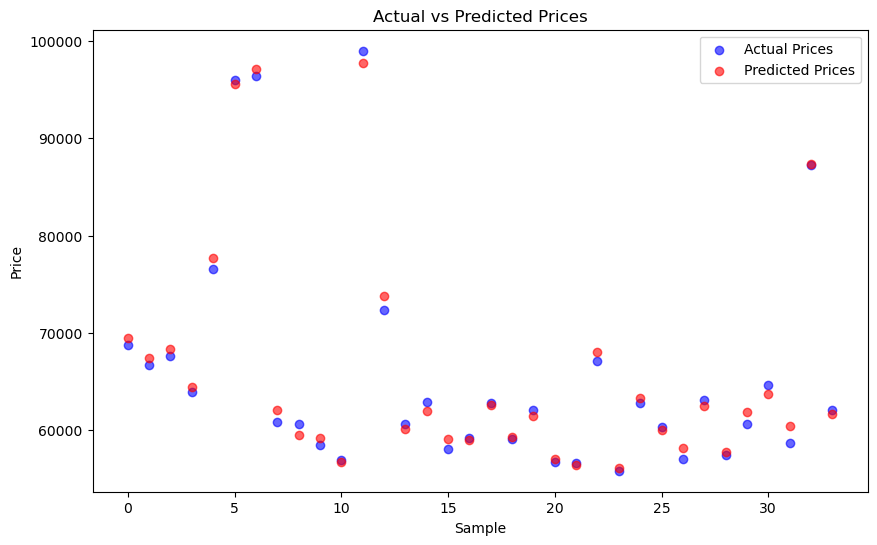

In [86]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual Prices", color="blue", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted Prices", color="red", alpha=0.6)
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.xlabel("Sample")
plt.ylabel("Price")
plt.show()